# Time Series Analysis Mini Project:  Let's explore my steps, and if we are feeling froggy maybe use FB prophet to model...

In [24]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Acquire!

### Imported steps from my personal Iphone pedometer. 

#### Steps to repeat:
1. Export from Iphone pedometer in settings
2. Save to file
3. Upload using pandas!

In [6]:
df = pd.read_csv("Export.csv")

In [9]:
df.head(2)

,Date,Steps,Distance,Floors Ascended
0,8/16/20,14656,6.7,0
1,8/15/20,10103,4.7,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 4 columns):
Date               589 non-null object
Steps              589 non-null int64
Distance           589 non-null float64
Floors Ascended    589 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 18.5+ KB


# Prepare!!

### Initial thoughts:
- This is a really simple data frame
- Only 3 columns to explore in additon to datetime

### Action Items:
- Lets rename some columns in a pythonic manner (h/t Ryan Orsinger)
- Lets set the index as datetime so we can do some time series analysis.

### Personal Notes on Time-Series Analysis
- For the past couple of projects I have been blowing off TSA by moving the target variable from the next time-series row into the current row.  For this mini-project I wanted to do "pure" TSA.
- I also have been anxious to explore FB prophet, so I will be importing and exploring here.


In [15]:
#rename columns
df = df.rename(columns={'Date':'date',
                  'Steps': 'steps',
                    'Distance': 'distance',
                  'Floors Ascended': 'floors_ascended'})

In [27]:
# # set index to datetime
df['date'] = pd.to_datetime(df.date)
df = df.sort_values('date').set_index('date')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2018-08-26 to 2020-08-16
Data columns (total 3 columns):
steps              589 non-null int64
distance           589 non-null float64
floors_ascended    589 non-null int64
dtypes: float64(1), int64(2)
memory usage: 18.4 KB


# Explore!!!

### Questions to explore:
1. What is the relationship between `steps` and `distance`
2. Is there any value to the `floors_ascended` column
3. What day of the week to I walk the most
4. Do I purposefully try to get over my steps ceiling (10,000 steps)
5. How often do I cross my steps ceiling?

In [31]:
df['validate_steps'] = df.steps/ df.distance

In [32]:
df.validate_steps.describe()

count     588.000000
mean     2288.413467
std       142.308722
min      1864.565217
25%      2187.159515
50%      2292.075758
75%      2389.688735
max      2704.000000
Name: validate_steps, dtype: float64

Text(0.5, 1.0, 'Histogram of steps per mile by day')

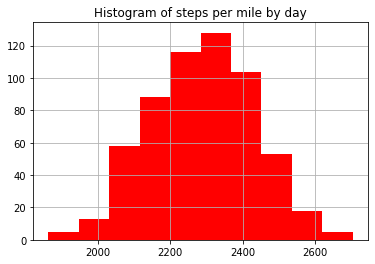

In [35]:
df.validate_steps.hist(color='red')
plt.title("Histogram of steps per mile by day")

**Takeaways**: It looks like there is enough of a variation the steps and distance are not calculated off the same data, which means that both columns have value in exploration. 

    (Unnecessary explanation: if steps and distance had little to no variation then we could assume that they are being calculated by the same measure either gps location or a gyroscopic movement within the phone.  Since they are not, we can examine the relationship between the two features, or use either as a target. 
    
**Next step**:  Prove it statistically

In [37]:
# exploring floors_ascended:
df.floors_ascended.describe()

count    589.000000
mean       1.298812
std        2.159227
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       22.000000
Name: floors_ascended, dtype: float64

Text(0.5, 1.0, 'How many floors do I walk up?')

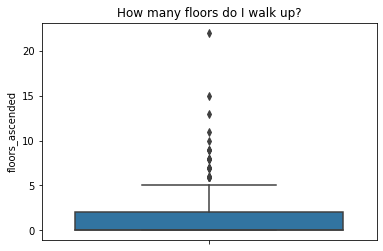

In [40]:
sns.boxplot(y='floors_ascended', data=df)
plt.title('How many floors do I walk up?')

**Takeaways**:  Anecdotal information:  My house is single story.  I don't walk up stairs to go to work.  My neighboorhood is flat.  More than 50% of the days, I do not walk up a flight of stairs.   However, there might be some valuable information in what days are the non-zero days.  Worth taking a look...

In [51]:
print(f'I do not ascend a full set of stairs {round((df.floors_ascended == 0).mean(),4 )*100} percent of the days in this data set')

I do not ascend a full set of stairs 53.31 percent of the days in this data set


In [52]:
# How much do I walk?
df.steps.describe()

count      589.000000
mean      9956.735144
std       5039.222937
min          0.000000
25%       6018.000000
50%      10053.000000
75%      13052.000000
max      25356.000000
Name: steps, dtype: float64

Text(0.5, 1.0, 'Histogram of distribution of steps')

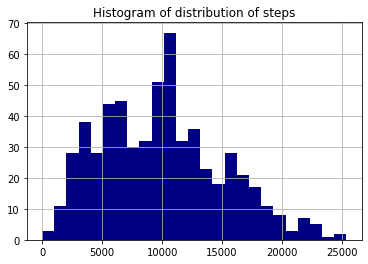

In [58]:
df.steps.hist(bins=25, color='navy')
plt.title('Histogram of distribution of steps')

**Takeaways**: There is a spike right around 10,000 steps which is my daily goal. 

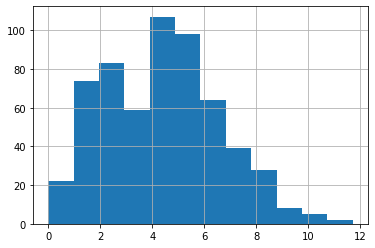

In [60]:
df.distance.hist(bins=12)

### What day of the week do I walk the most steps

In [62]:
df['weekday'] = df.index.day_name()

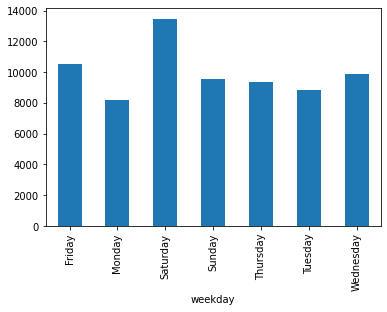

In [67]:
df.groupby('weekday').steps.mean().plot.bar()